In [2]:
import numpy as np
import numpy.linalg as la
import numpy.random as rand
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import itertools
from mpl_toolkits.mplot3d import Axes3D
import math
# from pydlm import dlm, autoReg, trend, seasonality
# from pydlm import modelTuner
from statsmodels.tsa.stattools import adfuller
from matplotlib import cm
from scipy.integrate import odeint
from scipy import stats
from EDMtoolkit import *
from modelSystems import *
import datetime
import seaborn as sns

plt.rcParams['text.usetex'] = True

%load_ext autoreload
%autoreload 2
# %matplotlib notebook

# Generate Series from a Linear Model

In [3]:
def generateLinearSeries(length=200,pro_noise=0.0, obs_noise=0.1, theta=lambda t: np.pi/6):
    
    A = lambda theta: np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
    
    X = np.zeros((length,2))
    init = np.exp(2*np.pi*rand.uniform(0,1)*1j)
    X[0] = (2 ** 0.5) * np.array([init.real, init.imag]) # rand.normal(2)

    for i in range(length-1):
        t = i / (length-1) # if ns else 0
        X[i+1] = (A(theta(t)) @ X[i]) + rand.normal(0,pro_noise,2)
    
    ts = X[:,0] + (rand.normal(0,1,length) * obs_noise)
    
    # return standardize(ts) if ns else standardize(ts)
    return ts # + np.linspace(0,1,num=length) if ns else ts

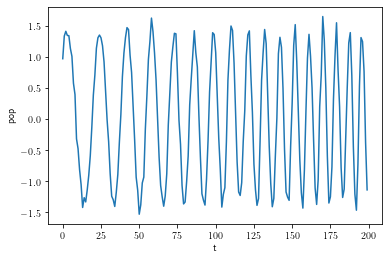

1.0021859483476019

In [4]:
Xr = generateLinearSeries(theta = lambda t: (0.5 + t) * np.pi / 6)
plotTS(Xr)
np.std(Xr)

# Find NS Rate that breaks DLM

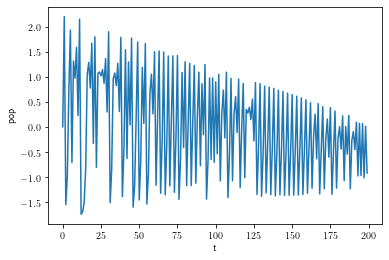

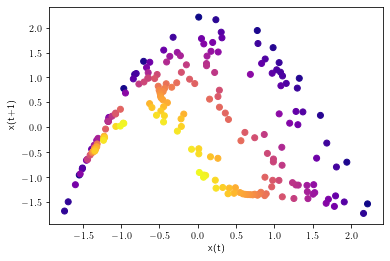

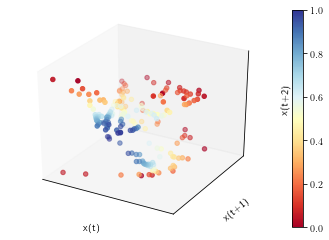

In [5]:
T = 200
r = lambda t: 4 - 0.25 * t / T
k = lambda t: 2 - 1 * t / T

x0 = rand.rand(1)
# Xr = standardize(generateTimeSeriesDiscrete("RickerP", x0, tlen=T, nsargs=(r,k)))
Xr = standardize(generateTimeSeriesDiscrete("LogisticP", x0, tlen=T, nsargs=(r,k)))

# Xr = standardize(np.log(Xr+np.exp(1)))
# Xr += rand.normal(0,noise_magnitude,Xr.shape[0])[:,None]
# Xr += noise_magnitude * np.ptp(Xr) * (rand.random((Xr.shape[0],1))-0.5) 
plotTS(Xr)
poincare2d(Xr, color_wrt_time=True)
poincare3d(Xr, color_wrt_time=True)

In [6]:
table = np.zeros((1, 6), dtype=np.longdouble)

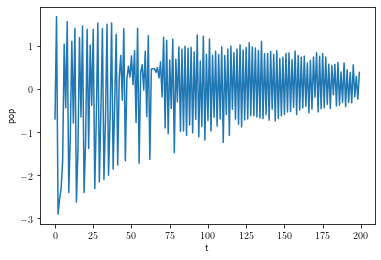

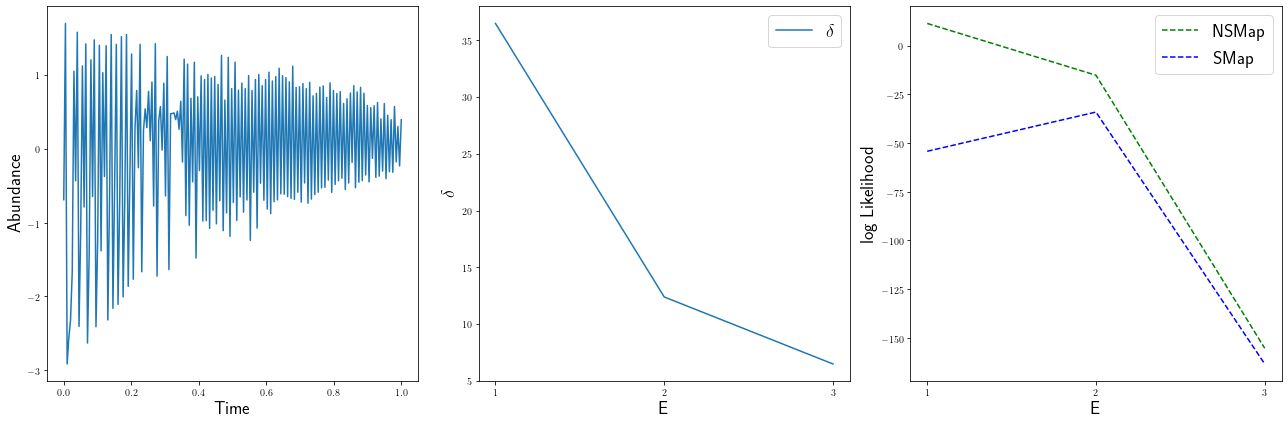

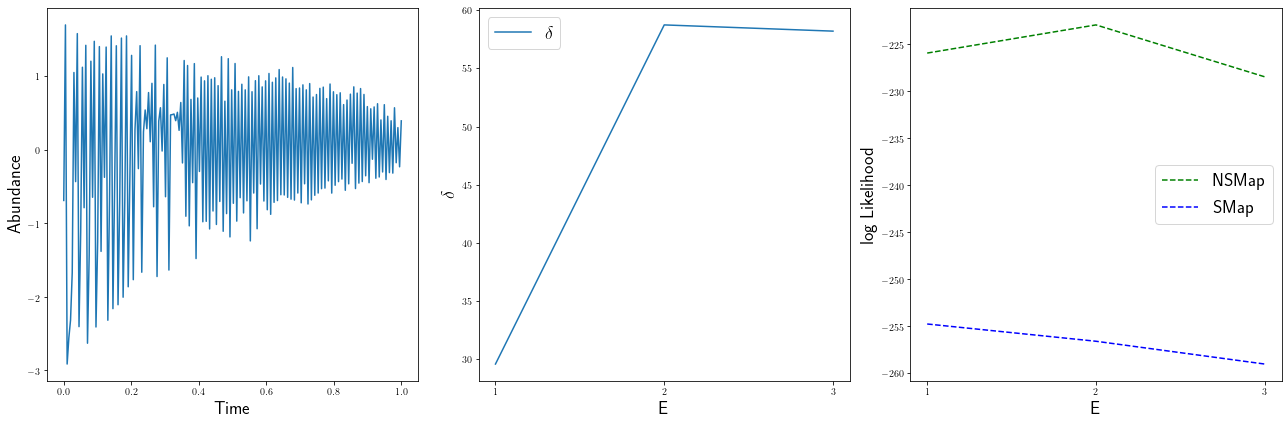

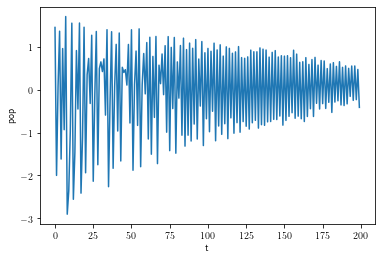

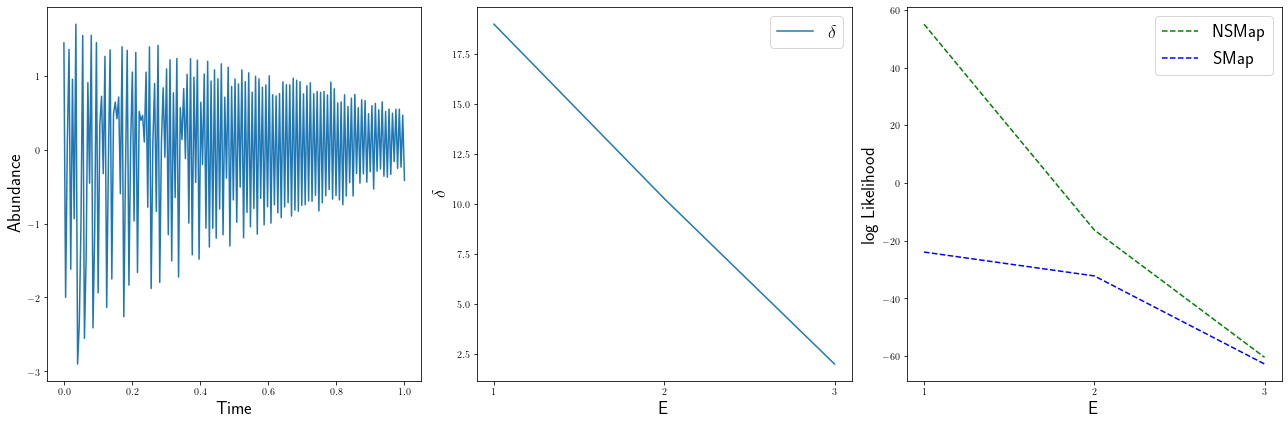

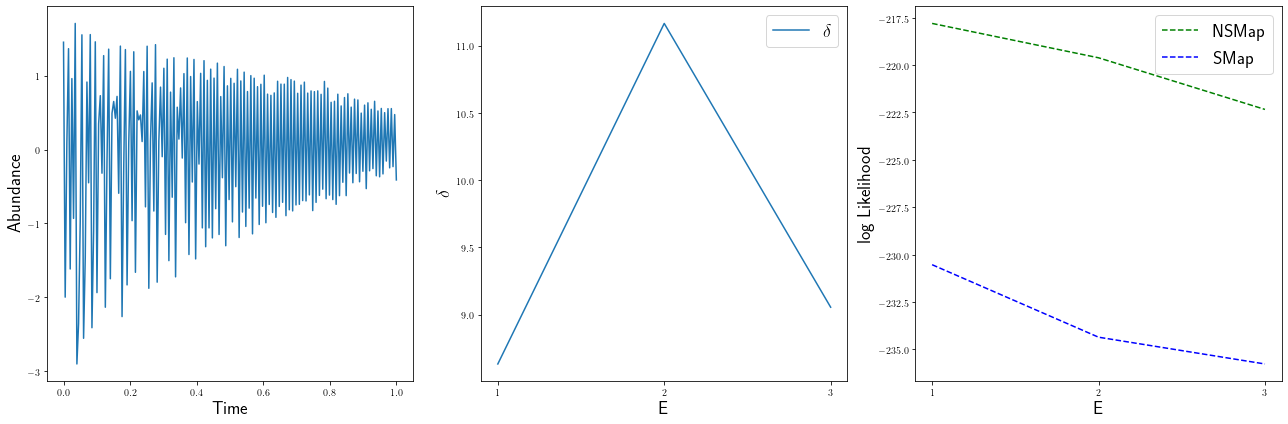

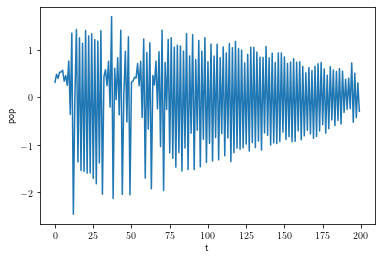

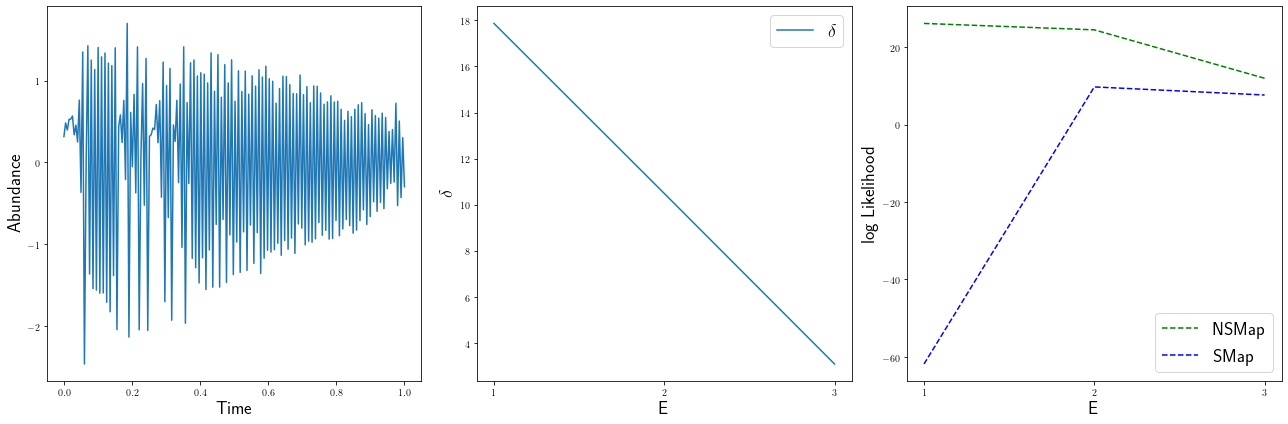

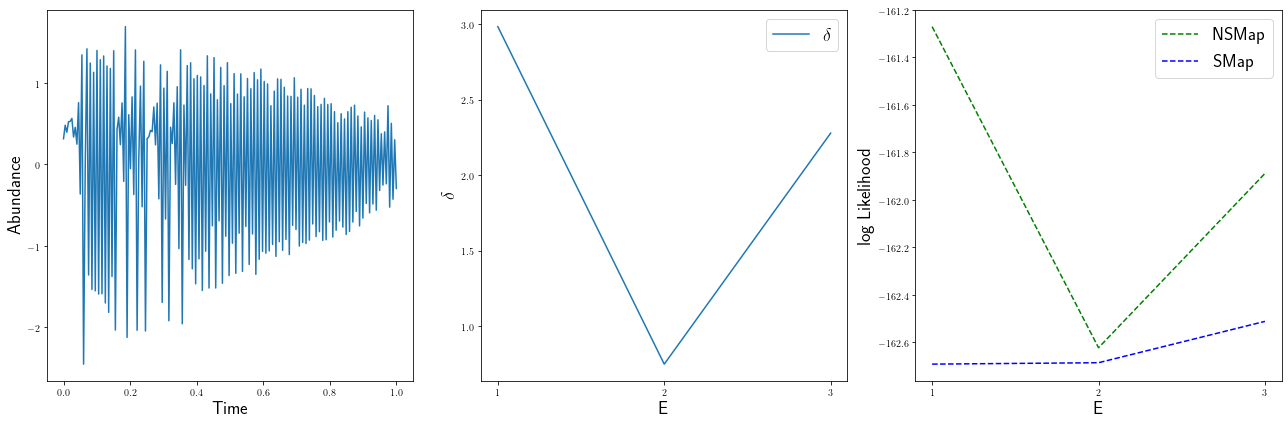

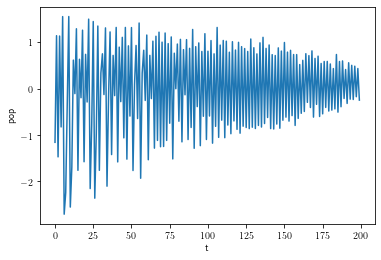

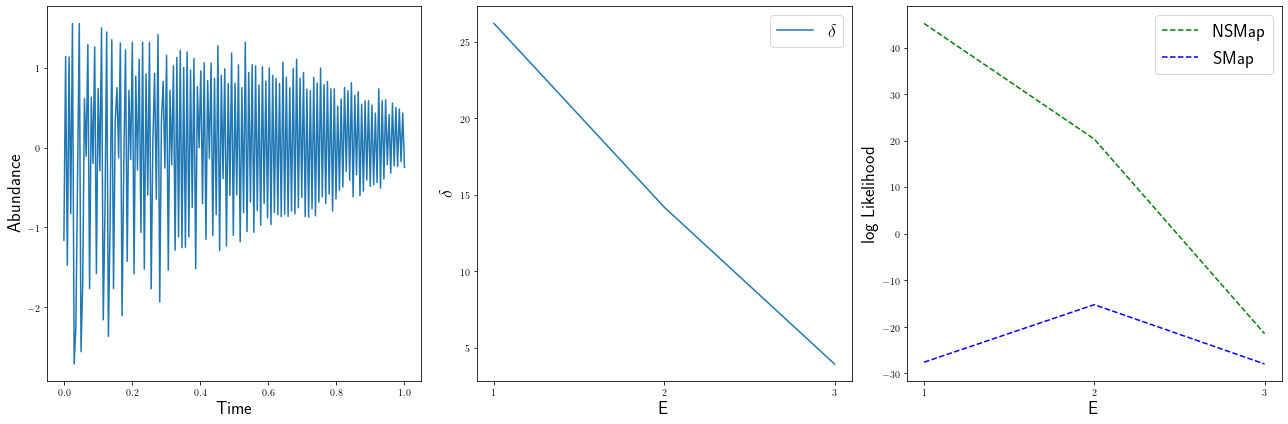

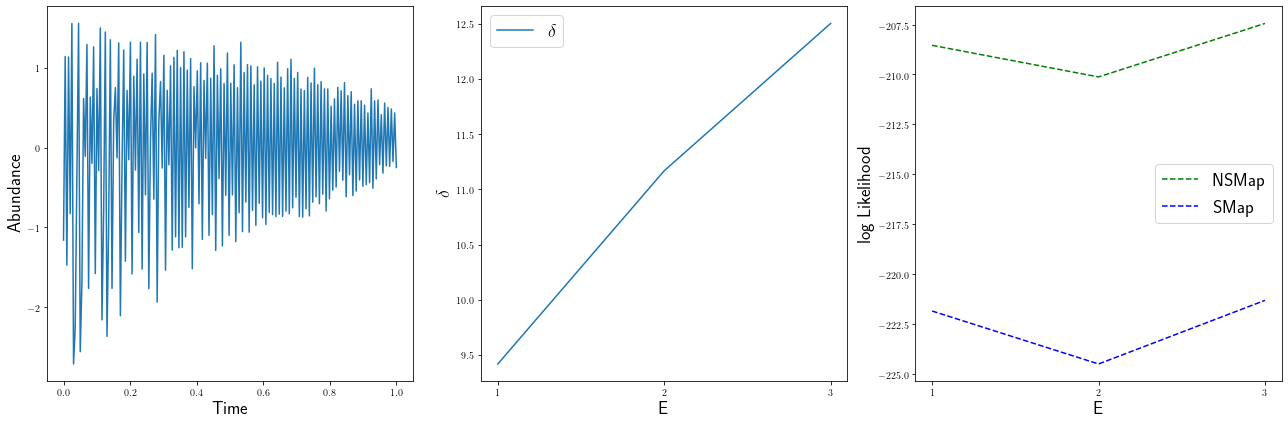

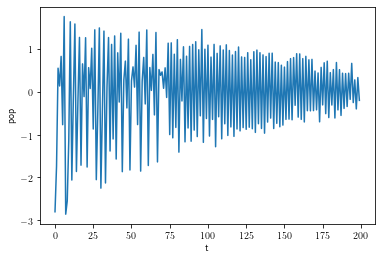

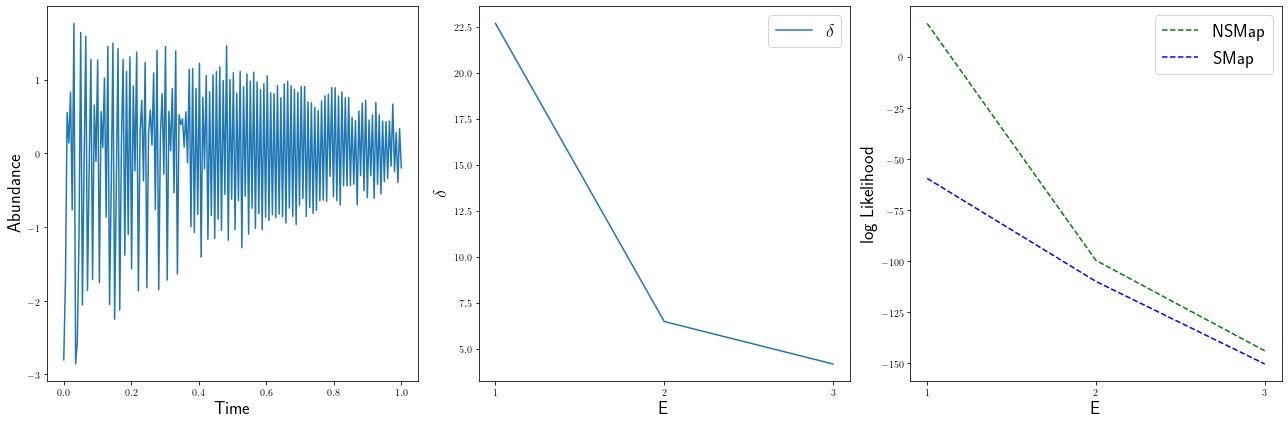

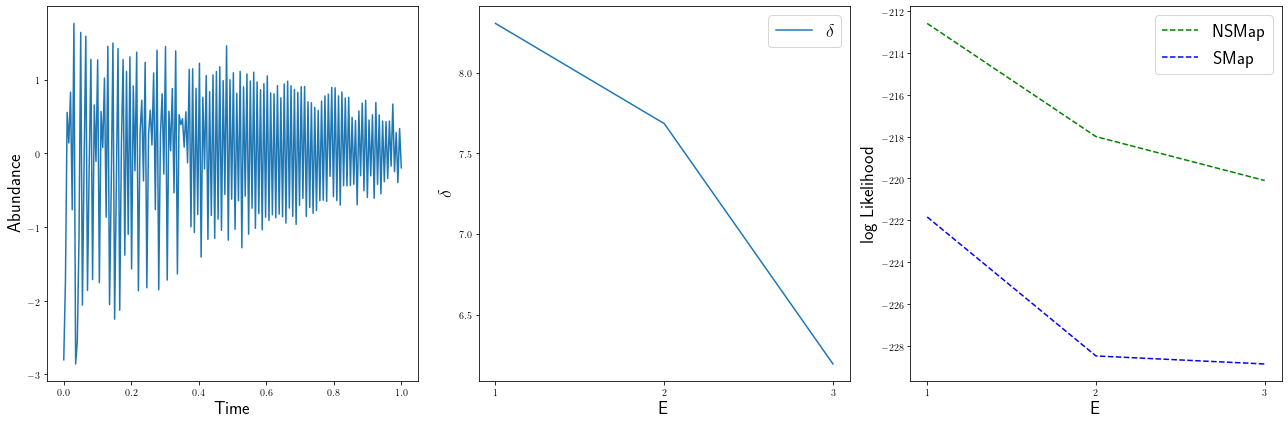

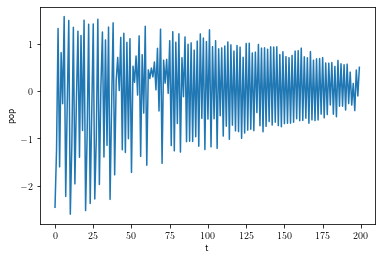

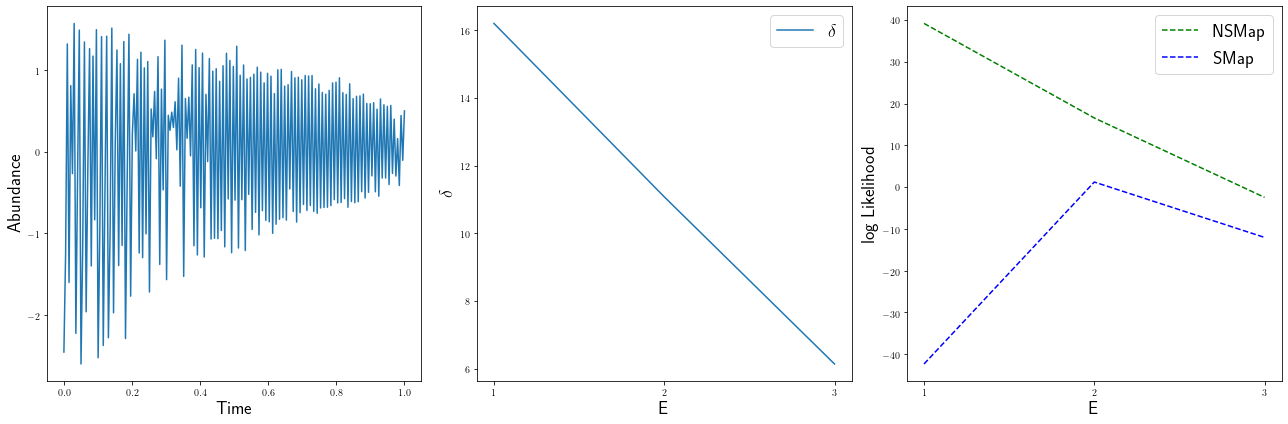

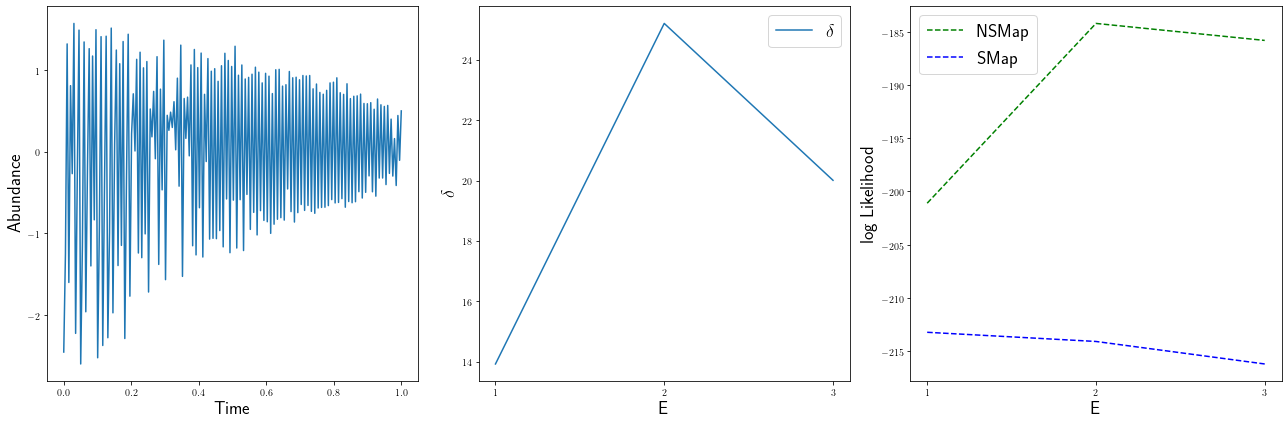

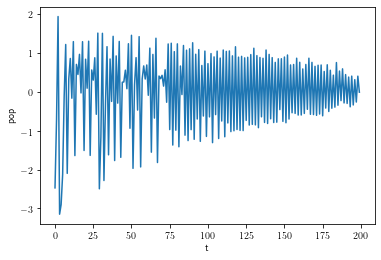

KeyboardInterrupt: 

In [10]:
horizon = 1
E_max = 2
noise_magnitude = 0.1

# figLr, axLr = plt.subplots(1)

while True:
    rate = 1
    
    T = 200
    # r = lambda t: 2 + 2 * t / T
    # k = lambda t: 2 - t / T

    # x0 = rand.rand(1)
    # Xr = standardize(generateTimeSeriesDiscrete("RickerP", x0, tlen=T, nsargs=(r,k)))

    # Xr = standardize(np.log(Xr+np.exp(1)))
    # Xr += rand.normal(0,noise_magnitude,Xr.shape[0])[:,None]
    
    # rate = rand.random(1)[0]
    # print(f"Rate = {rate}")

    # r = lambda t: 3.75 - 0.25 * rate * t / T
    # r = lambda t: 6 - 3 * rate * t / T
    
    T = 200
    r = lambda t: 4 - t / T
    k = lambda t: 1 # 2 - 1 * t / T

    x0 = rand.rand(1)
    # Xr = standardize(generateTimeSeriesDiscrete("RickerP", x0, tlen=T, nsargs=(r,k)))
    Xr = standardize(generateTimeSeriesDiscrete("LogisticP", x0, tlen=T, nsargs=(r,k)))

    # x0 = rand.rand(1)
    # Xr = generateTimeSeriesDiscrete("LogisticP", x0, tlen=T, nsargs=(r,))
    # Xr = standardize(Xr)
    Xr += rand.normal(0,noise_magnitude,Xr.shape[0])[:,None]
    # Xr += noise_magnitude * np.ptp(Xr) * (rand.random((Xr.shape[0],1))-0.5) 
    plotTS(Xr)
    # poincare2d(Xr, color_wrt_time=True)
    
    delta_agg, theta_agg, r_sqrd = get_delta_agg(Xr, E_max, return_forecast_skill=True)
    delta_agg_DLM, theta_agg_DLM, r_sqrd_DLM = get_delta_agg(Xr, E_max, return_forecast_skill=True, theta_fixed=True)
    
    newrow = np.array([rate, theta_agg, delta_agg, r_sqrd, delta_agg_DLM, r_sqrd_DLM])
    table = np.vstack([table, newrow])
    

In [7]:
table

array([[0., 0., 0., 0., 0., 0.]], dtype=float64)

In [8]:
# r4minus1table = table
# r375minus075table = table
# rickerr3plus3table = table

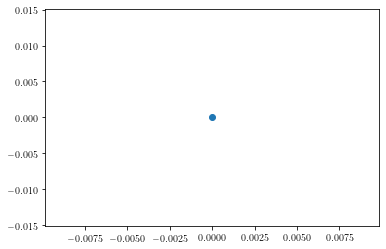

In [9]:
plt.scatter(table[:,3],table[:,1])

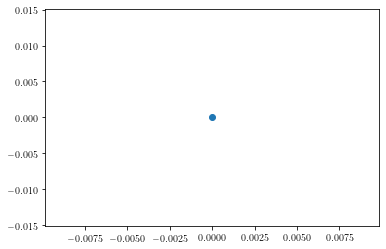

In [10]:
plt.scatter(table[:,5],table[:,4])

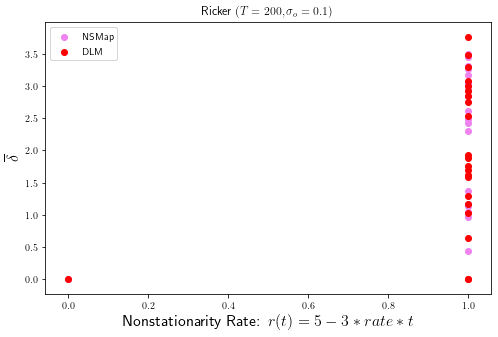

In [244]:
figLr, axLr = plt.subplots(1,figsize=(8,5))

# whereabouts = table[:,0] < 1

axLr.scatter(table[:,0],np.log(table[:,2]+1),
             color="violet", label = "NSMap")
axLr.scatter(table[:,0],np.log(table[:,4]+1),
             color="red", label= "DLM")
axLr.set_ylabel(r"$\overline{\delta}$",fontsize=16)
axLr.set_xlabel(r"Nonstationarity Rate: $r(t) = 5 - 3 * rate * t$",fontsize=16)
axLr.set_title(r"Ricker $(T=200, \sigma_o=0.1)$")
plt.legend()
plt.show()

In [58]:
np.log(table[np.argsort(table[:,0]),1] + 1)

array([0.        , 0.        , 1.04157741, 0.55739214, 0.        ,
       0.11035706, 0.87756405, 0.53021349, 0.41696339, 1.09305389,
       0.50913702, 0.        , 0.32127401, 0.        , 0.        ,
       0.        , 0.53160458, 0.        , 0.73740888, 1.32423566,
       0.        , 0.        , 0.14589986, 0.20512017, 1.48167327,
       0.80435238, 0.05576771, 0.        , 1.2738573 , 0.        ,
       0.79134079, 0.08667956, 1.0123194 , 0.70415746, 0.        ,
       0.0717983 , 0.15445342, 0.        , 1.99888667, 0.75125648,
       0.        , 1.50475209, 1.21447521, 0.        , 0.60500441,
       1.48729472, 0.03818383, 0.        , 0.        ])

In [44]:
np.log(r4minus1table[np.argsort(r4minus1table[:,0]),2] + 1)

array([0.75683586, 0.        , 0.        , 0.        , 1.54319293,
       0.10537291, 0.18277759, 0.        , 0.822     , 1.6355391 ,
       0.46928463, 0.46355065, 0.74081386, 1.27059503, 1.48778583,
       1.65869983, 2.1648785 , 1.37561535, 2.29006241, 2.16923519,
       1.27958593, 3.64763505, 1.59544213, 2.75893701, 1.68744039,
       1.79985315, 1.49617789, 2.89770506, 2.74724084, 1.89752491,
       2.67812706, 1.94276294, 1.56032651, 2.49258984, 2.91541097,
       2.42076912, 2.04374418, 2.04129688, 2.75055906, 2.05677113,
       2.49417147, 4.27716136, 3.2057967 , 2.35660203, 2.24936503,
       2.44028355, 2.09145952, 2.14468136, 2.56110249, 2.51658808,
       2.90527694, 2.35419053, 3.87959046, 2.27746958, 1.78737598,
       1.73673769, 2.73748353, 2.10740281, 2.06047286, 1.85366052,
       1.9962308 , 3.1890926 , 2.9385516 , 3.78460571, 2.28888777,
       2.55735934, 4.381153  , 2.7484007 , 1.56440737, 2.15175011,
       2.92512267, 3.8383106 , 3.4728272 , 2.72001065, 3.03714

In [42]:
np.log(table[np.argsort(table[:,0]),2] + 1)

array([0.        , 0.        , 0.        , 0.        , 0.33549971,
       0.10405509, 0.        , 0.        , 0.43470588, 0.        ,
       0.        , 0.        , 0.        , 1.26252928, 1.48267391,
       1.75317183, 1.58429286, 1.5557347 , 1.78002581, 1.87554029,
       2.3436898 , 2.13308998, 2.17872742, 1.97875672, 1.97748848,
       1.91304765, 1.80768251, 2.05196515, 1.85308521, 2.2701662 ,
       2.32130787, 2.3103563 , 2.24834659, 1.38516114, 1.30795029,
       2.4804814 , 2.747214  , 2.52645588, 2.24362998, 1.59141818,
       1.83780931, 1.90474586, 1.83287579, 1.67108387, 0.68013197,
       0.70599144, 1.94642339, 1.9734435 , 2.92575542, 1.58947575,
       1.0012845 , 1.99995553])

In [11]:
# General Hyperparameters
T = 200
o_n = 0.1
N_replicates = 100
reduction = 2 ** 8

In [13]:
# Linear Model NSMap vs DLM
E_max = 2

# ts_std is the standard deviation of the time series which
# is normalized to 1
log_std = 1
theta_list = (lambda t: np.pi / 6, lambda t: (0.875 + (t/4)) * np.pi / 6, lambda t: (0.5 + t) * np.pi / 6)

# nonstationarity status, delta, theta, r_sqrd, delta_DLM, r_sqrd_DLM
results = np.zeros((N_replicates * 3, 6))
results_index = 0

for ti, theta in enumerate(theta_list): # [True, False]:
    for i in range(N_replicates):
        Xr = generateLinearSeries(length=T, obs_noise=o_n, theta=theta)
        Xr += (rand.normal(0,1,T) * log_std * o_n)
        
        # plotTS(Xr)
        # poincare2d(Xr)
        
        delta_agg, theta_agg, r_sqrd = get_delta_agg(Xr, E_max, return_forecast_skill=True)
        delta_agg_DLM, theta_agg_DLM, r_sqrd_DLM = get_delta_agg(Xr, E_max, return_forecast_skill=True, theta_fixed=True)
        # dickey_fuller_p = adfuller(Xr)[1]
        
        results[results_index] = np.array([ti, delta_agg, theta_agg, r_sqrd, delta_agg_DLM, r_sqrd_DLM])
        results_index += 1
        
np.savetxt(f"linear_NSMap_vs_DLM.csv", results, fmt="%0.4f,%0.4f,%0.4f,%0.4f,%0.4f,%0.4f")

In [15]:
# Logistic Map NSMap vs DLM
# r_list = (lambda t: 3.75, lambda t: 3.75 - 0.75 * t / T)
# r_list = (lambda t: 3.75 - 0.75 *  t / T,)
r_list = (lambda t: 3.75, lambda t: 3.75 - 0.25 * t, lambda t: 3.75 - 0.75 * t)
E_max = 3
settlingTime = 200
# N_replicates = 30
# log_std is calculated as the standard deviation on a stationary logistic map series with T=200 and r=3.75

# nonstationarity status, delta, theta, r_sqrd, delta_DLM, r_sqrd_DLM
results = np.zeros((N_replicates * len(r_list), 6))
results_index = 0

for ri, r in enumerate(r_list):
    for i in range(N_replicates):
        x0 = rand.rand(1)
        Xr = standardize(generateTimeSeriesDiscrete("LogisticP", x0, tlen=T, nsargs=(r,), settlingTime=settlingTime))
        Xr += (rand.normal(0,1,T) * o_n)[:,None]

        delta_agg, theta_agg, r_sqrd = get_delta_agg(Xr, E_max, return_forecast_skill=True)
        delta_agg_DLM, theta_agg_DLM, r_sqrd_DLM = get_delta_agg(Xr, E_max, return_forecast_skill=True, theta_fixed=True)
        # dickey_fuller_p = adfuller(Xr)[1]
        
        results[results_index] = np.array([ri, delta_agg, theta_agg, r_sqrd, delta_agg_DLM, r_sqrd_DLM])
        results_index += 1
            
np.savetxt(f"logistic_NSMap_vs_DLM.csv", results, fmt="%0.4f,%0.4f,%0.4f,%0.4f,%0.4f,%0.4f")

In [16]:
# Food Chain NSMap vs DLM
end = T * 5
E_max = 4
settlingTime = 2 ** 9
N_replicates = 100

# b1_list = (lambda t: 3, lambda t: 3 + 4 * t / end)
# b1_list = (lambda t: 3 + 4 * t / end,)
b1_list = (lambda t: 3, lambda t: 3 + 2 * t / end, lambda t: 3 + 4 * t / end)

x0 = np.array([0.1,0.4,9]) + rand.random(3)
# log_std is calculated as the standard deviation on a stationary hastings powell map series with T=200 and b1=3
log_std = np.mean(np.array([np.std(generateTimeSeriesContinuous('HastingsPowellP', x0, end=end,
                                          tlen = T, nsargs=(b1_list[0],), 
                                          reduction = reduction, settlingTime=settlingTime, 
                                          process_noise=0)[:,0,None]) for i in range(20)]))

# nonstationarity status, delta, theta, r_sqrd, delta_DLM, r_sqrd_DLM
results = np.zeros((N_replicates * len(b1_list), 6))
results_index = 0

for b1i, b1 in enumerate(b1_list):
    for i in range(N_replicates):
        x0 = np.array([0.1,0.4,9]) + rand.random(3)
        Xr = generateTimeSeriesContinuous('HastingsPowellP', x0, end=end, tlen = T, nsargs=(b1,), 
                                          reduction = reduction, settlingTime=settlingTime, 
                                          process_noise=0)[:,0,None]
        Xr += (rand.normal(0,1,T) * log_std * o_n)[:,None]
        
        delta_agg, theta_agg, r_sqrd = get_delta_agg(Xr, E_max, return_forecast_skill=True)
        delta_agg_DLM, theta_agg_DLM, r_sqrd_DLM = get_delta_agg(Xr, E_max, return_forecast_skill=True, theta_fixed=True)
        
        results[results_index] = np.array([b1i, delta_agg, theta_agg, r_sqrd, delta_agg_DLM, r_sqrd_DLM])
        results_index += 1
        
        # print(delta_agg, delta_agg_DLM)  
np.savetxt(f"food_chain_NSMap_vs_DLM.csv", results, fmt="%0.4f,%0.4f,%0.4f,%0.4f,%0.4f,%0.4f")

In [321]:
results

array([[0.        , 0.        , 2.89043328, 0.92574699, 0.        ,
        0.55055016],
       [0.        , 0.        , 2.88551194, 0.93376637, 0.        ,
        0.54805639],
       [0.        , 0.        , 2.99421696, 0.91584253, 0.        ,
        0.51382972],
       ...,
       [1.        , 5.11147041, 3.0081424 , 0.91952476, 1.36129395,
        0.52888011],
       [1.        , 3.45433339, 2.86097606, 0.91459889, 0.29935569,
        0.54224798],
       [1.        , 4.8094319 , 2.6028468 , 0.89978962, 0.69389693,
        0.49398376]])

# Mockup of delta vs theta graph

In [14]:
# fill with data of results for Hastings Powell and Logistic in Round 2
l_data = np.loadtxt("logistic_NSMap_vs_DLM.csv",delimiter=',')
hp_data = np.loadtxt("hastings_powell_NSMap_vs_DLM.csv",delimiter=',')
lin_data = np.loadtxt("linear_NSMap_vs_DLM.csv",delimiter=',')

l_nonstat = np.log(l_data[l_data[:,0] == 1][:,1:3]+1)
l_stat = np.log(l_data[l_data[:,0] == 0][:,1:3]+1)
hp_nonstat = np.log(hp_data[hp_data[:,0] == 1][:,1:3]+1)
hp_stat = np.log(hp_data[hp_data[:,0] == 0][:,1:3]+1)
lin_nonstat = np.log(lin_data[lin_data[:,0] == 1][:,1:3]+1)
lin_stat = np.log(lin_data[lin_data[:,0] == 0][:,1:3]+1)

NameError: name 'lin_stat' is not defined

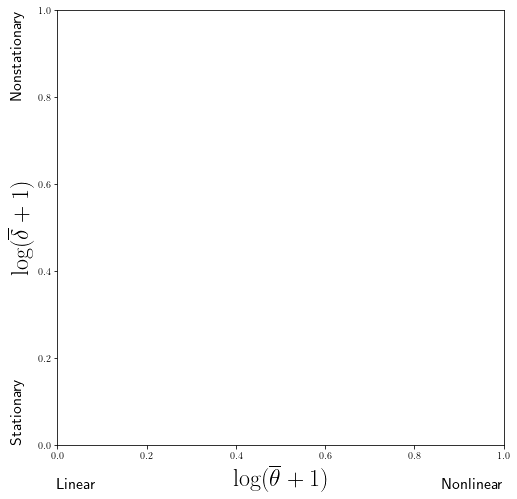

In [17]:
size = 100
alpha = 0.5
dither = 0.02
fontsize_ticks = 16
fontsize_legend = 12
fontsize_axis = 24
fontsize_text = 16
text_padding = -0.075

dithering = lambda: rand.normal(0,dither,size=size)

dvt_fig, dvt_ax = plt.subplots(1, figsize=(8,8))
dvt_ax.set_xlabel(r"$\log(\overline{\theta}+1)$",fontsize=fontsize_axis)
dvt_ax.set_ylabel(r"$\log(\overline{\delta}+1)$",fontsize=fontsize_axis)
# dvt_ax.set_xticks([0,1.75])
dvt_ax.text(text_padding, 1, "Nonstationary", size=fontsize_text, rotation=90, 
            horizontalalignment="right", verticalalignment="top",
            transform=dvt_ax.transAxes)
dvt_ax.text(text_padding, 0, "Stationary", size=fontsize_text, rotation=90,
           horizontalalignment="right",verticalalignment="bottom",
           transform=dvt_ax.transAxes)
dvt_ax.text(0, text_padding, "Linear", size=fontsize_text,
           horizontalalignment="left",verticalalignment="top",
           transform=dvt_ax.transAxes)
dvt_ax.text(1, text_padding, "Nonlinear", size=fontsize_text,
           horizontalalignment="right",verticalalignment="top",
           transform=dvt_ax.transAxes)

dvt_ax.scatter(lin_stat[:,1]+dithering(), lin_stat[:,0]+dithering(), 
               c="dodgerblue",marker="s", s=size, edgecolors="black", 
               label="Linear Stationary", alpha=alpha)
dvt_ax.scatter(lin_nonstat[:,1]+dithering(), lin_nonstat[:,0]+dithering(), 
               c="orange",marker="s", s=size, edgecolors="black", 
               label="Linear Nonstationary", alpha=alpha)
dvt_ax.scatter(l_stat[:,1]+dithering(), l_stat[:,0]+dithering(), 
               c="dodgerblue", s=size, edgecolors="black", 
               label="Logistic Stationary", alpha=alpha)
dvt_ax.scatter(l_nonstat[:,1]+dithering(), l_nonstat[:,0]+dithering(), 
               c="orange", s=size, edgecolors="black", 
               label="Logistic Nonstationary", alpha=alpha)
dvt_ax.scatter(hp_stat[:,1]+dithering(), hp_stat[:,0]+dithering(), 
               c="dodgerblue",marker="v", s=size, edgecolors="black", 
               label="Hastings Powell Stationary", alpha=alpha)
dvt_ax.scatter(hp_nonstat[:,1]+dithering(), hp_nonstat[:,0]+dithering(), 
               c="orange",marker="v", s=size, edgecolors="black", 
               label="Hastings Powell Nonstationary", alpha=alpha)

plt.xticks(fontsize=fontsize_ticks, rotation=0)
plt.yticks(fontsize=fontsize_ticks, rotation=0)
plt.legend(prop={"size":fontsize_legend})
plt.show()

In [16]:
# DLM Version

for model in ["l", "hp", "lin"]:
    t1 = locals()[model+"_data"]
    for status in ["stat","nonstat"]:
        t2 = t1[t1[:,0] == (status == "nonstat")]
        for appr in ["DLM", "NS"]:
            t3 = [t2[:,1:4:2] if appr == "NS" else t2[:,4:]][0]
            locals()[model+"_"+status+"_"+appr] = t3

## NSMap vs DLM

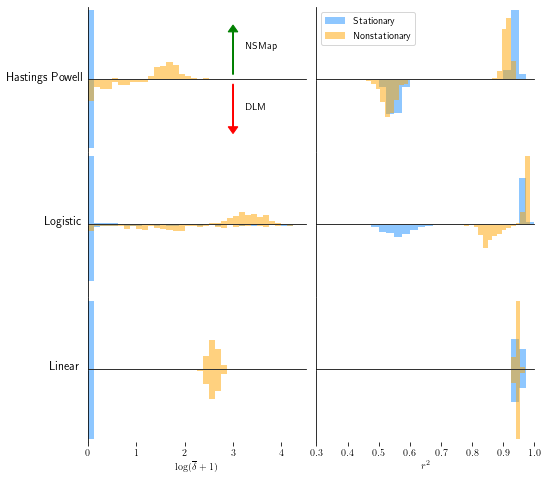

In [17]:
vfig, vax = plt.subplots(6,2,figsize=(8,8))
B=40

dithering = lambda : rand.normal(0,0.01,100)

for m,model in enumerate(["hp", "l", "lin"]):
    for s,status in enumerate(["stat","nonstat"]):
        for a,appr in enumerate(["NS","DLM"]):
            t3 = locals()[model+"_"+status+"_"+appr]
            if status == "stat":
                # sns.kdeplot(data=dithering()+np.log(t3[:,0]+1), ax=vax[int(m*2+a),0],color="dodgerblue")
                # sns.kdeplot(data=dithering()+t3[:,1], ax=vax[int(m*2+a),1],color="dodgerblue")
                vax[int(m*2+a),0].hist(np.log(t3[:,0]+1),color="dodgerblue",alpha=0.5,range=(0,5),bins=B,density=True)
                vax[int(m*2+a),1].hist(t3[:,1],color="dodgerblue",alpha=0.5,range=(0,1),bins=B,density=True,label="Stationary")
            else:
                # sns.kdeplot(data=dithering()+np.log(t3[:,0]+1), ax=vax[int(m*2+a),0],color="orange")
                # sns.kdeplot(data=dithering()+t3[:,1], ax=vax[int(m*2+a),1],color="orange")
                vax[int(m*2+a),0].hist(np.log(t3[:,0]+1),color="orange",alpha=0.5,range=(0,5),bins=B,density=True)
                vax[int(m*2+a),1].hist(t3[:,1],color="orange",alpha=0.5,range=(0.4,1),bins=B,density=True,label="Nonstationary")
            
            # vax[int(m*2+a),0].set_ylabel(model + ", " +appr)
            vax[int(m*2+a),0].set_xlim([0,4.5])
            vax[int(m*2+a),0].set_yticks([])
            vax[int(m*2+a),0].spines["top"].set_visible(False)
            vax[int(m*2+a),0].spines["right"].set_visible(False)
            vax[int(m*2+a),1].set_xlim([0.3,1])
            vax[int(m*2+a),1].set_yticks([])
            vax[int(m*2+a),1].spines["top"].set_visible(False)
            vax[int(m*2+a),1].spines["right"].set_visible(False)
            
            if (m*2+a) % 2 == 1:
                vax[int(m*2+a),0].spines["bottom"].set_visible(False)
                vax[int(m*2+a),1].spines["bottom"].set_visible(False)
            
            if m*2+a != 5:
                vax[int(m*2+a),0].set_xticks([])
                vax[int(m*2+a),1].set_xticks([])

for m in range(3):
    max_bounds_d = max(vax[int(m*2),0].get_ylim()[1],vax[int(m*2+1),0].get_ylim()[1])
    max_bounds_r = max(vax[int(m*2),1].get_ylim()[1],vax[int(m*2+1),1].get_ylim()[1])

    if (appr == "DLM"):
        vax[int(m*2+a),0].set_ylim([max_bounds_d,0])
        vax[int(m*2+a),1].set_ylim([max_bounds_r,0])
    else:
        vax[int(m*2+a),0].set_ylim([0,max_bounds_d])
        vax[int(m*2+a),1].set_ylim([0,max_bounds_r])
                            
vax[-1,0].set_xlabel(r"$\log(\overline{\delta}+1)$")
vax[-1,1].set_xlabel(r"$r^2$")
plt.subplots_adjust(hspace=0.01,wspace=0.05)
vfig.text(-0.015,0.75,"Hastings Powell",size=12)
vfig.text(0.05,0.5,"Logistic",size=12)
vfig.text(0.06,0.25,"Linear",size=12)
vax[0,0].arrow(3,0.5,0,5,head_width=0.2, head_length=0.8,color="green")
vax[1,0].arrow(3,0.5,0,5,head_width=0.2, head_length=0.8,color="red")
vax[0,0].text(3.25,3.5,"NSMap")
vax[1,0].text(3.25,3.5,"DLM")
vax[0,1].legend()
# plt.tight_layout()

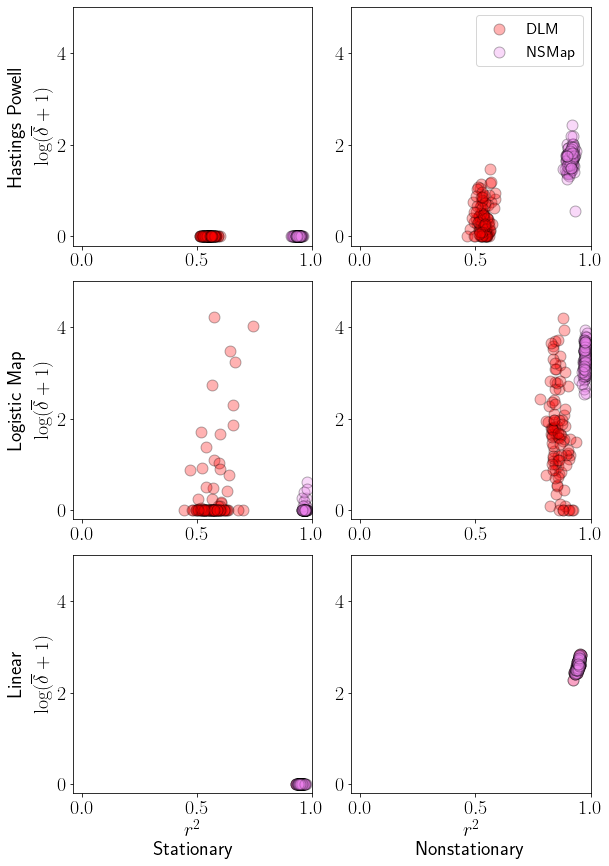

In [18]:
vfig, vax = plt.subplots(3,2,figsize=(8.5,12))
B=40
size = 120
fontsize_axis = 20
fontsize_ticks = 20
fontsize_text = 20

text_padding_y = -0.2
text_padding_x = -0.2

dithering = lambda : rand.normal(0,0.01,100)

for m, model in enumerate(["hp", "l", "lin"]):
    for s, status in enumerate(["stat","nonstat"]):
        for a, appr in enumerate(["DLM","NS"]):
            t3 = locals()[model + "_" + status + "_" + appr]
            if appr == "DLM":
                vax[m,s].scatter(t3[:,1],np.log(t3[:,0]+1),
                                 color="red",s=size, 
                                 edgecolors="black",
                                 alpha=0.3,label="DLM")
            else:
                vax[m,s].scatter(t3[:,1],np.log(t3[:,0]+1),
                                 color="violet",s=size, 
                                 edgecolors="black",
                                 alpha=0.3,label="NSMap")
            
            vax[m,s].set_xlim([-0.04,1])
            vax[m,s].set_ylim([-0.2,5])
            vax[m,s].tick_params(axis='both',which='major',
                                 labelsize=fontsize_ticks)

for i in range(3):
    vax[i,0].set_ylabel(r"$\log(\overline{\delta}+1)$",size=fontsize_axis)
for i in range(2):
    vax[2,i].set_xlabel(r"$r^2$",size=fontsize_axis)

vax[0,0].text(text_padding_y, 0.5, "Hastings Powell", rotation=90,
              verticalalignment="center", horizontalalignment="right",
              transform=vax[0,0].transAxes,size=fontsize_text)
vax[1,0].text(text_padding_y, 0.5, "Logistic Map", rotation=90,
              verticalalignment="center", horizontalalignment="right",
              transform=vax[1,0].transAxes,size=fontsize_text)
vax[2,0].text(text_padding_y, 0.5, "Linear", rotation=90,
              verticalalignment="center", horizontalalignment="right",
              transform=vax[2,0].transAxes,size=fontsize_text)
vax[2,0].text(0.5, text_padding_x, "Stationary",
              verticalalignment="top", horizontalalignment="center",
              transform=vax[2,0].transAxes,size=fontsize_text)
vax[2,1].text(0.5, text_padding_x, "Nonstationary", 
              verticalalignment="top", horizontalalignment="center",
              transform=vax[2,1].transAxes,size=fontsize_text)

vax[0,1].legend(fontsize=16)
plt.tight_layout()

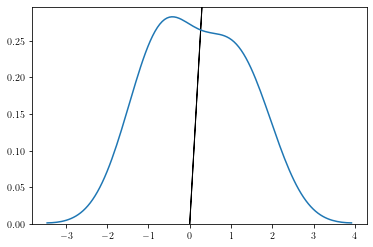

In [19]:
fig7, ax7 = plt.subplots(1)
sns.kdeplot(data=rand.normal(0,1,10),ax=ax7)
ax7.arrow(0,0,0.5,0.5)
plt.show()

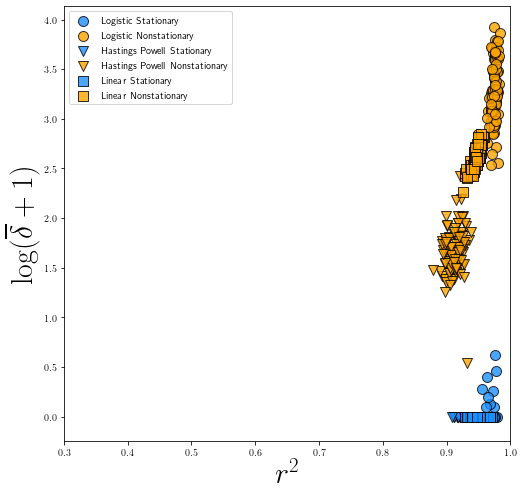

In [20]:
size = 100

d1_fig, d1_ax = plt.subplots(1, figsize=(8,8))
d1_ax.set_xlabel(r"$r^2$",fontsize=30)
d1_ax.set_ylabel(r"$\log(\overline{\delta}+1)$",fontsize=30)
d1_ax.set_xlim([0.3,1])
#dvt_ax.set_xticks([])
#dvt_ax.set_yticks([])

# DLM = grey, NSMap = gold

d1_ax.scatter(l_stat_NS[:,1], np.log(l_stat_NS[:,0]+1), c="dodgerblue", s=size, edgecolors="black", label="Logistic Stationary", alpha=0.8)
d1_ax.scatter(l_nonstat_NS[:,1], np.log(l_nonstat_NS[:,0]+1), c="orange", s=size, edgecolors="black", label="Logistic Nonstationary", alpha=0.8)
d1_ax.scatter(hp_stat_NS[:,1], np.log(hp_stat_NS[:,0]+1), c="dodgerblue",marker="v", s=size, edgecolors="black", label="Hastings Powell Stationary", alpha=0.8)
d1_ax.scatter(hp_nonstat_NS[:,1], np.log(hp_nonstat_NS[:,0]+1), c="orange",marker="v", s=size, edgecolors="black", label="Hastings Powell Nonstationary", alpha=0.8)
d1_ax.scatter(lin_stat_NS[:,1], np.log(lin_stat_NS[:,0]+1), c="dodgerblue",marker="s", s=size, edgecolors="black", label="Linear Stationary", alpha=0.8)
d1_ax.scatter(lin_nonstat_NS[:,1], np.log(lin_nonstat_NS[:,0]+1), c="orange",marker="s", s=size, edgecolors="black", label="Linear Nonstationary", alpha=0.8)

plt.legend()
plt.show()

In [90]:
np.mean(l_data[:,3])

0.969881

In [91]:
np.mean(hp_data[:,3])

0.9252594999999999

<IPython.core.display.Javascript object>


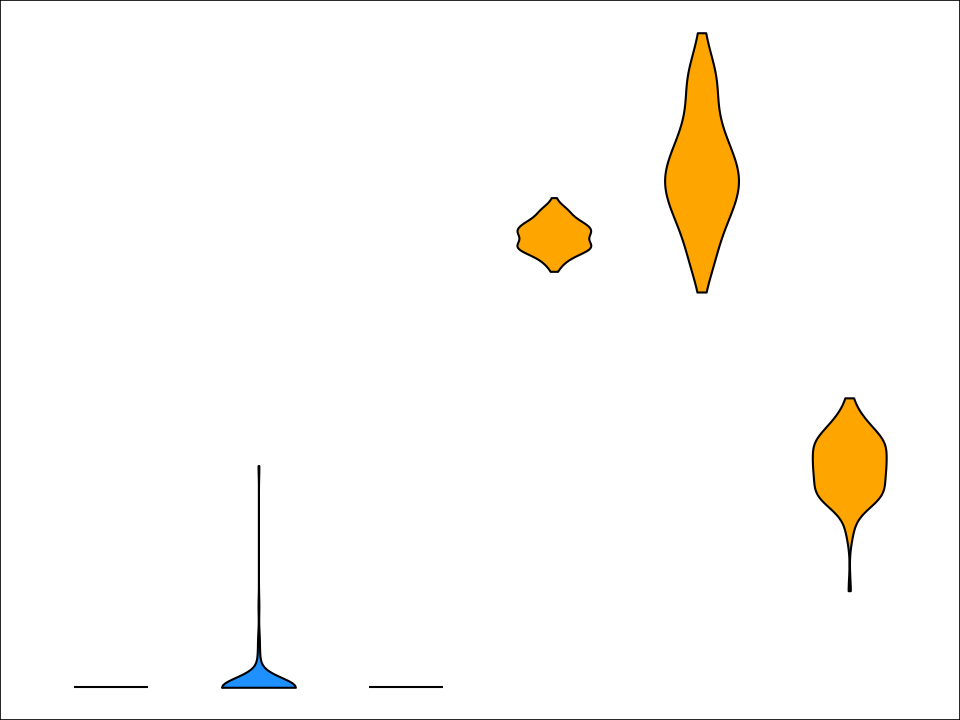

In [92]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bp = ax.violinplot([lin_stat, l_stat, hp_stat, lin_nonstat, l_nonstat, hp_nonstat],showextrema=False)

for i, pc in enumerate(bp["bodies"]):
    if i >= 3:
        pc.set_facecolor("orange")
        pc.set_edgecolor("black")
    else:
        pc.set_facecolor("dodgerblue")
        pc.set_edgecolor("black")
    pc.set_alpha(1)

labels = ["Stationary Linear", "Stationary Linear","Stationary Linear","Stationary Linear","Stationary Linear","Stationary Linear"]
  
ax.set_xticks(np.arange(1, len(labels) + 1))
ax.set_xticklabels(labels)
ax.set_xlim(0.25, len(labels) + 0.75)
    
plt.show()

In [ ]:
l_nonstat = np.log(l_data[l_data[:,0] == 1][:,1]+1)
l_stat = np.log(l_data[l_data[:,0] == 0][:,1]+1)
hp_nonstat = np.log(hp_data[hp_data[:,0] == 1][:,1]+1)
hp_stat = np.log(hp_data[hp_data[:,0] == 0][:,1]+1)
lin_nonstat = np.log(lin_data[lin_data[:,0] == 1][:,1]+1)
lin_stat = np.log(lin_data[lin_data[:,0] == 0][:,1]+1)

# Old Code

In [ ]:
def rand_disc(n, minimum=0,maximum=1):
    return np.sign(rand.uniform(-1,1,size=n))*rand.uniform(minimum,maximum,size=n)
    # return np.exp(rand.uniform(size=n)*np.pi*2j)
    # return rand.uniform(minimum,maximum,size=n)*np.exp(rand.uniform(size=n)*np.pi*2j)

def calculate_coeff(roots):
    
    # contains the phi which satisfies (1-phi*z)=0 when z=root
    coefs_root_form = -1 / roots
    subset_sizes = range(1,len(coefs_root_form)+1)
    
    # sum all 1 element subsets, then 2 element subsets, ... n element subsets
    return np.array([np.sum(np.prod(np.array(list(itertools.combinations(coefs_root_form, subset_size))),axis=1)) for subset_size in subset_sizes])
    
def eval_poly(coefs, value):
    return 1 + np.sum(coefs * (value ** np.arange(1,len(coefs)+1)))

In [ ]:
np.set_printoptions(suppress=True, precision=3)

roots = rand_disc(10,2,3)
coefs = calculate_coeff(roots)

print(np.array(list([eval_poly(coefs,root) for root in roots])))

In [ ]:
tlen = 100
X = rand_disc(tlen)
l = 6

ar_roots = rand_disc(l,np.pi,4)
ar_coeffs = -calculate_coeff(ar_roots)

for i in range(tlen-l):
    X[i+l] = np.sum(ar_coeffs * X[i:i+l])
    
plotTS(X)
ar_roots